# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-05 00:00:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  83.4MB/s    in 1.0s    

2025-01-05 00:00:33 (83.4 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

## **Load bioactivity data**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('bioactivity_data_preprocessed_ErbB2.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [6]:
import numpy as np
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 52 kB/s 


### **Calculate descriptors**

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
    """
    Calculates Lipinski descriptors (MW, LogP, NumHDonors, NumHAcceptors) for a list of SMILES strings.

    Args:
        smiles (list): List of SMILES strings.
        verbose (bool): If True, prints debug information for invalid SMILES.

    Returns:
        pd.DataFrame: DataFrame with Lipinski descriptors for valid SMILES strings.
    """
    moldata = []
    for elem in smiles:
        if not isinstance(elem, str):
            if verbose:
                print(f"Skipping invalid entry (not a string): {elem}")
            moldata.append(None)
            continue
        mol = Chem.MolFromSmiles(elem)
        if mol is None:
            if verbose:
                print(f"Skipping invalid SMILES: {elem}")
        moldata.append(mol)

    # Initialize an empty list to store the descriptors
    descriptors_data = []

    # Compute descriptors for each molecule
    for i, mol in enumerate(moldata):
        if mol is None:
            # Skip invalid molecules
            continue
        try:
            desc_MolWt = Descriptors.MolWt(mol)
            desc_MolLogP = Descriptors.MolLogP(mol)
            desc_NumHDonors = Lipinski.NumHDonors(mol)
            desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

            # Append the descriptors to the list
            descriptors_data.append([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        except Exception as e:
            if verbose:
                print(f"Error processing molecule at index {i}: {e}")

    # Define column names
    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]

    # Create a DataFrame from the descriptors data
    descriptors_df = pd.DataFrame(descriptors_data, columns=column_names)

    return descriptors_df

In [8]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3,4
1,383.814,4.45034,3,4
2,482.903,3.61432,3,6
3,482.903,3.61432,3,6
4,559.630,4.82482,3,7
...,...,...,...,...
3219,469.545,4.95334,2,7
3220,851.981,6.85800,2,12
3221,851.981,6.85800,2,12
3222,560.486,5.35440,2,8


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2500.0,active
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,1210.0,active
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active
...,...,...,...,...
4123,NaN,NaN,NaN,active
4124,NaN,NaN,NaN,active
4125,NaN,NaN,NaN,active
4126,NaN,NaN,NaN,active


Now, let's combine the 2 DataFrame

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active,383.814,4.45034,3.0,4.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2500.0,active,383.814,4.45034,3.0,4.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active,482.903,3.61432,3.0,6.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,1210.0,active,482.903,3.61432,3.0,6.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active,559.630,4.82482,3.0,7.0
...,...,...,...,...,...,...,...,...
4123,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
4124,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
4125,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
4126,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [13]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [14]:
df_combined.standard_value.describe()

,standard_value
count,3.228000e+03
mean,8.318332e+03
std,4.330421e+04
min,6.000000e-02
25%,4.822500e+01
50%,2.000000e+02
75%,2.700000e+03
max,1.600000e+06


In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [19]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,2500.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,400.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,1210.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.0
...,...,...,...,...,...,...,...,...
4123,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4124,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4125,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4126,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


In [20]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,3.228000e+03
mean,8.318332e+03
std,4.330421e+04
min,6.000000e-02
25%,4.822500e+01
50%,2.000000e+02
75%,2.700000e+03
max,1.600000e+06


In [21]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,5.602060
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,5.917215
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
...,...,...,...,...,...,...,...,...
4123,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4124,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4125,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4126,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


In [22]:
df_final.pIC50.describe()

,pIC50
count,3228.000000
mean,6.487013
std,1.218223
min,2.795880
25%,5.568636
50%,6.698970
75%,7.316729
max,10.221849


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [23]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,5.602060
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,5.917215
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
...,...,...,...,...,...,...,...,...
4123,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4124,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4125,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
4126,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


In [24]:
# Remove all rows with NaN values
df_2class_cleaned = df_2class.dropna()

# Verify the cleaned DataFrame
print(df_2class_cleaned)




     molecule_chembl_id                                   canonical_smiles  \
0           CHEMBL68920  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...   
1           CHEMBL68920  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...   
2           CHEMBL69960  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...   
3           CHEMBL69960  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...   
4           CHEMBL67057  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...   
...                 ...                                                ...   
1856      CHEMBL2316777  Cc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c(...   
1857      CHEMBL2311747  Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c...   
1858      CHEMBL2316794  COc1ccc(-c2csc(N3N=C(c4ccc(Br)cc4)CC3c3ccc4c(c...   
1859      CHEMBL2316793  Clc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c...   
1860      CHEMBL2315700  CC1=CCC[C@H]2[C@](C)(CC3=C(O)C(=O)C=C(N[C@@H](...   

     bioactivity_class       MW     LogP  NumHDonors  NumHAccep

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

<ipython-input-26-1d8d25a730c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


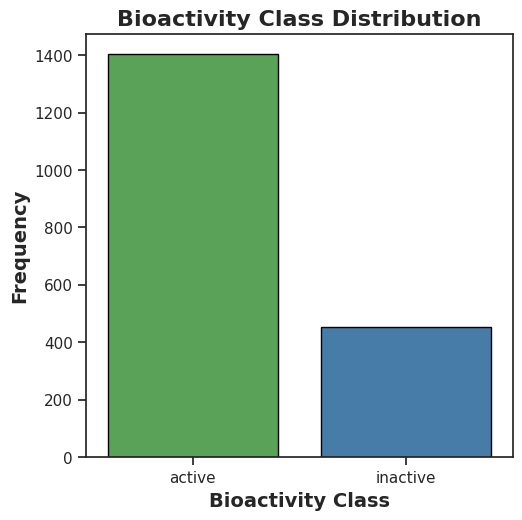

In [26]:
# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the count plot with customized colors for each bioactivity class
sns.countplot(
    x='bioactivity_class',
    data=df_2class_cleaned,
    edgecolor='black',
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Add a title for better presentation
plt.title('Bioactivity Class Distribution', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_bioactivity_class_colored.pdf')

# Display the plot
plt.show()

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

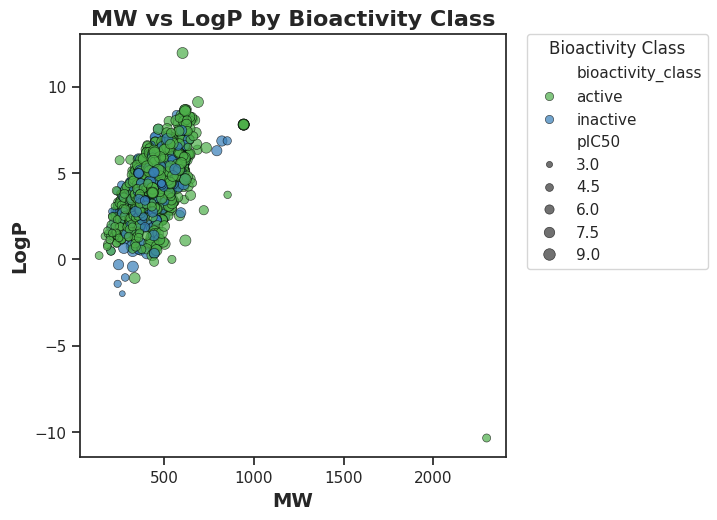

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the scatter plot with customized colors for bioactivity classes
sns.scatterplot(
    x='MW',
    y='LogP',
    data=df_2class_cleaned,
    hue='bioactivity_class',  # Distinguish classes by color
    size='pIC50',  # Size of points based on pIC50
    edgecolor='black',
    alpha=0.7,
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# Adjust the legend position
plt.legend(
    title='Bioactivity Class',
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0
)

# Add a title for better presentation
plt.title('MW vs LogP by Bioactivity Class', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_MW_vs_LogP_colored.pdf')

# Display the plot
plt.show()


### **Box plots**

#### **pIC50 value**

<ipython-input-28-df054906f6c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


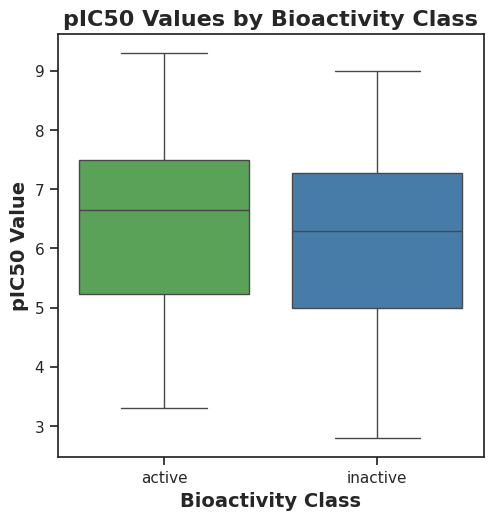

In [28]:
# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the box plot with customized colors
sns.boxplot(
    x='bioactivity_class',
    y='pIC50',
    data=df_2class_cleaned,
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')

# Add a title for better presentation
plt.title('pIC50 Values by Bioactivity Class', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_ic50_colored.pdf')

# Display the plot
plt.show()


**Statistical analysis | Mann-Whitney U Test**

In [29]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class_cleaned[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class_cleaned[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [30]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,353161.5,0.000396,0.05,Different distribution (reject H0)


#### **MW**

<ipython-input-31-ea52c9273e82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


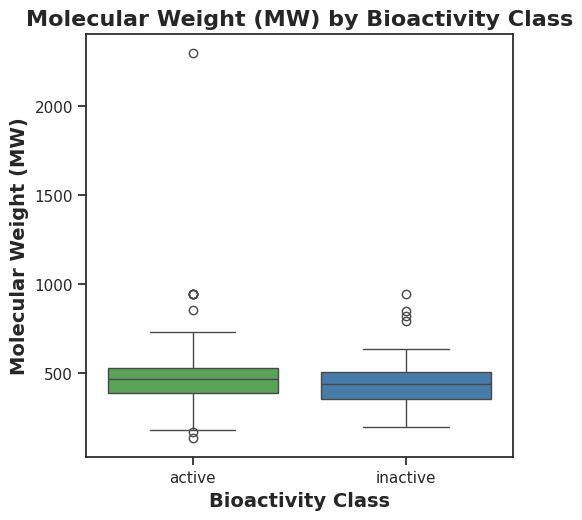

In [31]:
# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the box plot with customized colors
sns.boxplot(
    x='bioactivity_class',
    y='MW',
    data=df_2class_cleaned,
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Molecular Weight (MW)', fontsize=14, fontweight='bold')

# Add a title for better presentation
plt.title('Molecular Weight (MW) by Bioactivity Class', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_MW_colored.pdf')

# Display the plot
plt.show()

In [32]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,358793.0,0.00004,0.05,Different distribution (reject H0)


#### **LogP**

<ipython-input-34-247bd9032433>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


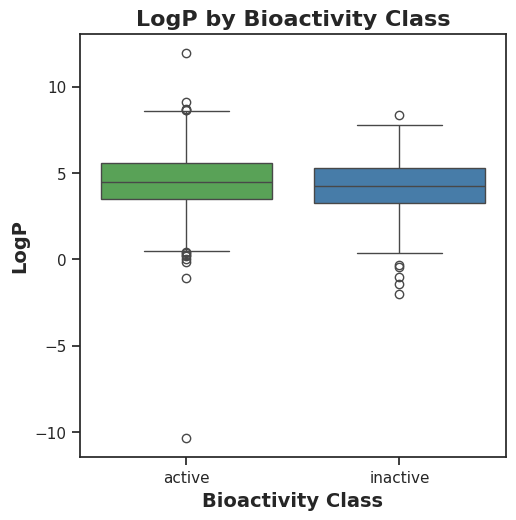

In [34]:
# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the box plot with customized colors
sns.boxplot(
    x='bioactivity_class',
    y='LogP',
    data=df_2class_cleaned,
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# Add a title for better presentation
plt.title('LogP by Bioactivity Class', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_LogP_colored.pdf')

# Display the plot
plt.show()

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,350661.5,0.000999,0.05,Different distribution (reject H0)


#### **NumHDonors**

<ipython-input-36-9e5ba7a088a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


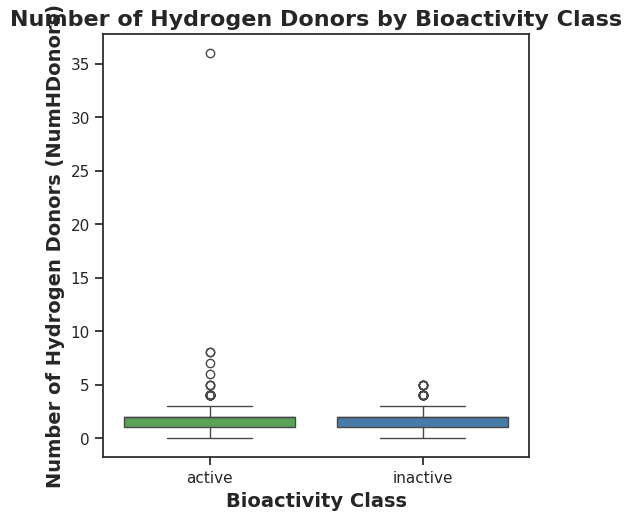

In [36]:
# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the box plot with customized colors
sns.boxplot(
    x='bioactivity_class',
    y='NumHDonors',
    data=df_2class_cleaned,
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Hydrogen Donors (NumHDonors)', fontsize=14, fontweight='bold')

# Add a title for better presentation
plt.title('Number of Hydrogen Donors by Bioactivity Class', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_NumHDonors_colored.pdf')

# Display the plot
plt.show()


**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,318587.5,0.949281,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

<ipython-input-38-0a3569950f89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


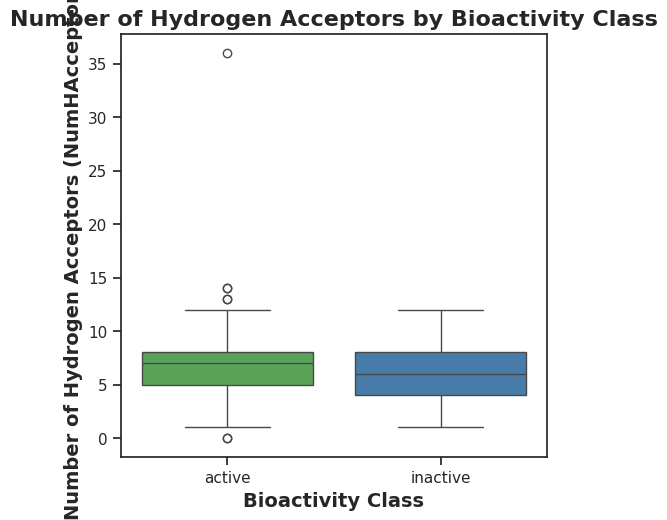

In [38]:
# Adjust figure size
plt.figure(figsize=(5.5, 5.5))

# Create the box plot with customized colors
sns.boxplot(
    x='bioactivity_class',
    y='NumHAcceptors',
    data=df_2class_cleaned,
    palette=['#4daf4a', '#377eb8']  # Two custom colors for the classes
)

# Customize axis labels
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Hydrogen Acceptors (NumHAcceptors)', fontsize=14, fontweight='bold')

# Add a title for better presentation
plt.title('Number of Hydrogen Acceptors by Bioactivity Class', fontsize=16, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_NumHAcceptors_colored.pdf')

# Display the plot
plt.show()

In [39]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,348398.0,0.001972,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only NumHDonors exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHAcceptors and LogP) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [40]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW_colored.pdf (deflated 38%)
  adding: plot_MW_vs_LogP_colored.pdf (deflated 3%)
  adding: plot_LogP_colored.pdf (deflated 39%)
  adding: plot_bioactivity_class_colored.pdf (deflated 36%)
  adding: plot_NumHAcceptors_colored.pdf (deflated 36%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHDonors_colored.pdf (deflated 36%)
  adding: plot_ic50_colored.pdf (deflated 36%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: bioactivity_data_preprocessed_ErbB2.csv (deflated 85%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
